In [51]:
""" 

References:
Andrew Ng, Stanford - Coursera
Numerical Recipies (2007)

Fitting Data to a Straight Line 
y(x) = y(x|m,b) = mx + b

Machine Learning Notation
h_theta(x_i) = theta_0 + theta_1 * x_i

h: hypothesis that maps x => y
m: training examples
x: independent variable
y: dependent variable / label / target value
co-efficient: theta_0 (intercept, bias), theta_1 (slope, weight)
Minimize  half the function: h_theta (x_i) - y_i
avergaed MSE/2: cost function J(theta_0, theta_1):
0.5 * m * sum(h_theta (x_i) - y_i )^2

Goal: minmize J(thet_0, Theta_1)

"""

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

filename = '../input/Iris.csv'

df       = pd.read_csv(filename,sep=',')

# Attribute Information:
# 0. row number
# 1. sepal length in cm
# 2. sepal width in cm
# 3. petal length in cm
# 4. petal width in cm
# 5. class:
#    0 - Iris Setosa
#    1 - Iris Versicolour
#    2 - Iris Virginica

Scatter Matrix


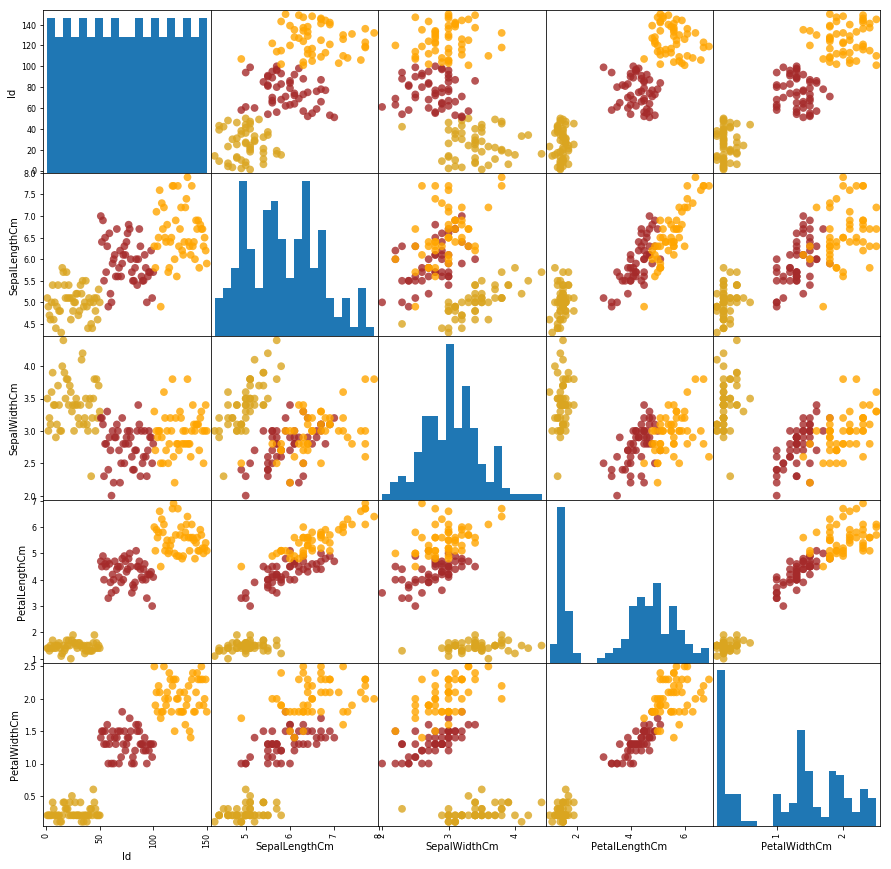

In [52]:
# Visually Explore the Data
print ('Scatter Matrix')

# Map label to integer
labelcolors  = pd.factorize(df.Species)[0]
speciescolors = ['goldenrod','brown','orange']

# Scatter plot of the data
multi = pd.plotting.scatter_matrix(df,
        c=labelcolors, cmap=matplotlib.colors.ListedColormap(speciescolors),
        figsize=(15, 15), marker='o',
        hist_kwds={'bins': 20}, s=60, alpha=.8)



In [53]:
def simple_linear_regression(x, y):
    """
    General Linear Least Squares
    Find the slope and intercept using
    mean(x), mean(y), covar(x,y), var(x)
    https://en.wikipedia.org/wiki/Simple_linear_regression#Numerical_example
    http://mathworld.wolfram.com/LeastSquaresFitting.html
    """
    # norm = len(xt)-1   # NumPy normalizes variance by N-ddof
    norm = 0
    
    # covar = np.cov(x,y,ddof=norm)
    covar = np.cov(x.astype(float),y.astype(float),ddof=norm)
    
    theta_1 = covar [0,1] / covar[0,0]
    theta_0 = np.mean(y) - ( theta_1 * np.mean(x) )

    # The propotion of SSyy (covar[1,1]) acounted for by the regresion
    print ( 'r-squared: ', covar[0,1]**2 / ( covar[0,0]*covar[1,1] ) )

    return theta_0, theta_1, 0


In [54]:
def gradient_descent_regression(x, y):
    """
    Batch gradient descent approach to minimize  cost function J

    repeat until convergence
    theta_j := theta_j - alpha * d/dtheta_j ( J(theta_0, theta_1) )
    (for j=0 and j=1)

    Corrector: simultaneous update
    temp0 = theta_0 - alpha d/dtheta_0 J()
    temp1 = theta_1 - alpha d/dtheta_1 J()
    theta_0 : temp0
    theta_1 : temp1

    where:
    d/dtheta_0 : = J(0) := 1/m * sum  ( h_theta(x_i) - y_i )        # PD wrt theta_0
    d/dtheta_1 : = J(1) := 1/m * sum (( h_theta(x_i) - y_i ) * x_i) # PD wrt theta_1

    Play with niters and alpha for best fit

    """

    niters    = 2000
    alpha     = 0.05                     # Learning Rate or Step Size

    m         = x.size

    theta_0   = 0. ;     theta_1   = 0.  #  Initial Guess
    J_0       = 0. ;     J_1 = 0.   


    for i in range (0,niters):

        h    = theta_0 + theta_1 *  x

        J_0  = np.sum(  h - y      ) / m
        J_1  = np.sum( (h - y) * x ) / m

        temp0 = theta_0 - alpha * J_0
        temp1 = theta_1 - alpha * J_1

        theta_0 = temp0
        theta_1 = temp1

    return theta_0, theta_1, cost

In [55]:
def abline (xt, theta_0, theta_1):
    """ 
    Generate discrete straight line to plot
    """
    return [theta_0 + theta_1*i for i in xt]

def predict (xtest, ytest, theta_0, theta_1):
    """
    Predict the feature value
    using the slope and intercept (line fitting co-efficients)
    calculated from the training data
    """
    
    ypredict = abline (xtest, theta_0, theta_1)

    # Co-efficient of determination - R-squared
    SSR  = np.sum ( ( ypredict - np.mean(ytest) )**2 )
    SSE  = np.sum ( ( ytest    - ypredict       )**2 )
    SSTO = np.sum ( ( ytest    - np.mean(ytest) )**2 )

    r_squared = SSR / SSTO

    print ( 'SSR/SSTO: ' , r_squared, '     1-SSE/SSTO: ', 1 - SSE / SSTO )
     
    RMSE = np.sqrt ( SSE / len(ytest) )
    print ( 'RMSE: ', RMSE )

    return ypredict

r-squared:  0.669048146342

Predict with least squares fit: 
SSR/SSTO:  0.720369326033      1-SSE/SSTO:  0.925773011426
RMSE:  0.179805387143

Predict with gradient descent co-efficients: 
SSR/SSTO:  0.576558342014      1-SSE/SSTO:  0.892405578883
RMSE:  0.216479439819


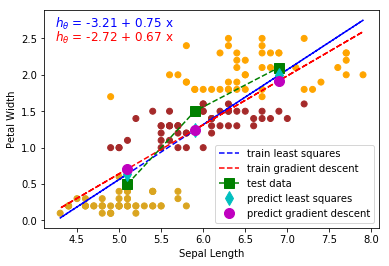

In [56]:
# Train
xt = df.SepalLengthCm.values
yt = df.PetalWidthCm.values

theta_0_s, theta_1_s, cost = simple_linear_regression    (xt, yt)
theta_0_g, theta_1_g, cost = gradient_descent_regression (xt, yt)

fit_s = r'$h_\theta$ = ' +  "{:.2f}".format(theta_0_s) + ' + '  + "{:.2f}".format(theta_1_s) + ' x'
fit_g = r'$h_\theta$ = ' +  "{:.2f}".format(theta_0_g) + ' + '  + "{:.2f}".format(theta_1_g) + ' x'

# Test

test_SepalLength  = np.array([5.1, 5.9, 6.9])
test_SepalWidth   = np.array([3.3, 3.0, 3.1])
test_PetalLength  = np.array([1.7, 4.2, 5.4])
test_PetalWidth   = np.array([0.5, 1.5, 2.1])

# Given Sepal Length predict Petal Width
print ('\nPredict with least squares fit: ')
predict_PetalWidth_s = predict (test_SepalLength, test_PetalWidth, theta_0_s, theta_1_s)

print ('\nPredict with gradient descent co-efficients: ')
predict_PetalWidth_g = predict (test_SepalLength, test_PetalWidth, theta_0_g, theta_1_g)

plt.scatter(xt, yt, c=df.PetalWidthCm, cmap=matplotlib.colors.ListedColormap(speciescolors))
# plt.plot(xt, yt , c='k', label='training data', marker='o',ls='')

plt.plot(xt,abline(xt, theta_0_s, theta_1_s),  c='b',label='train least squares'   ,  ls='--')
plt.plot(xt,abline(xt, theta_0_g, theta_1_g),  c='r',label='train gradient descent',  ls='--')

plt.plot(test_SepalLength,test_PetalWidth,     c='g',label='test data',               ls='--', marker='s', markersize=10)
plt.plot(test_SepalLength,predict_PetalWidth_s,c='c',label='predict least squares',   ls='',   marker='d', markersize=10)
plt.plot(test_SepalLength,predict_PetalWidth_g,c='m',label='predict gradient descent',ls='',   marker='o', markersize=10)

plt.gcf().text(0.15, 0.82, fit_s, fontsize=12, color='b')
plt.gcf().text(0.15, 0.77, fit_g, fontsize=12, color='r')

plt.legend(loc=4)
plt.xlabel('Sepal Length')
plt.ylabel('Petal Width')

plt.show()